# Example 
way to use this library

In [1]:
pip install git+https://github.com/Dont-HurtMe/TopicModel-service.git

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
  Cloning https://github.com/Dont-HurtMe/TopicModel-service.git to /private/var/folders/xf/1xvzht_s2k1_t5hs1h05rb3h0000gn/T/pip-req-build-pcdm5sqp
  Running command git clone --filter=blob:none --quiet https://github.com/Dont-HurtMe/TopicModel-service.git /private/var/folders/xf/1xvzht_s2k1_t5hs1h05rb3h0000gn/T/pip-req-build-pcdm5sqp
  Resolved https://github.com/Dont-HurtMe/TopicModel-service.git to commit 96f975d5cda35b3d5968c7712f7947eb71b6d2fc
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/SothanaV/http-server.git (to revision 62b5a7d11b6de0ac574887afdcc3a4385cd53eb7) to /private/var/folders/xf/1xvzht_s2k1_t5hs1h05rb3h0000gn/T/pip-install-kgu_disw/http-server_ac34c85ebb0041ce8f0651418ac71589
  Running command git clone --filter=blob:none --quiet https://github.com/SothanaV/http-server.git /private/var/folder

## **Step by step**

In [1]:
import pandas as pd
import re
import string
import datasets

In [2]:
def cleanText(text):
    
    # source : https://github.com/naenumtou
    clear_list = r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#]*[\w@?^=%&/~+#])?|“|”|[()\/\+\*.,]|,|ๆ|<.*?>|#|'
    
    # text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(clear_list,'',text)

    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
       text = re.sub(r'\{}'.format(c),'',text)
        
    text = ' '.join(text.split())
    # text = text.translate(str.maketrans('', '', textPunc)) # Remove punctuation without (.)
    text = ' '.join(text.split())  # Keep only one white space
    return text

In [11]:
data = datasets.load_dataset('imdb')

In [12]:
df = pd.DataFrame(data['unsupervised'])[['text']]
df

,text
0,This is just a precious little diamond. The pl...
1,When I say this is my favourite film of all ti...
2,I saw this movie because I am a huge fan of th...
3,Being that the only foreign films I usually li...
4,After seeing Point of No Return (a great movie...
...,...
49995,License To Kill (1989) is an inanely dismal in...
49996,I love watching a James Bond. It's not very in...
49997,I can't decide what was the worst thing about ...
49998,UGH... As an adorer of the James Bond characte...


In [13]:
df = df.sample(500)
df['text'] = df['text'].apply(cleanText)
df

,text
35538,Awful simply awful It proves my theory about s...
17328,Detective Frank KellerAl Pacino in a perfect s...
34834,Saw the movie on TMC and it was indeed a class...
1207,Since this black and white B flick is only und...
726,Romasanta tells the chilling tale of Manuel Bl...
...,...
45201,Saturn 3 suffers from an identity crisis To lo...
44157,First off I have to admit that the story to Be...
20340,Rize is a documentary about Krumping and Clown...
12543,i really enjoyed this film the character are a...


### **Generate Vector : Embedding and reduction dimensions**

In [6]:
from dsm_wizservices.generate_vector import Generate_Vector 
from sentence_transformers import SentenceTransformer
from umap import UMAP

In [7]:
docs = df['text'].tolist()

In [8]:
# defind embedding model & reducer model
reducer = UMAP(n_neighbors=12, min_dist=0.01, random_state=1234)
transformer = SentenceTransformer('all-MiniLM-L6-v2', device='cpu')

/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [9]:
vec_generator = Generate_Vector(
    embedding_model = transformer,
    reduce_dimension_model = reducer, 
    batch_size = 32, 
    verbose = False,
)

In [10]:
vec_generator.input(docs)

In [11]:
model_annotations, process_data = vec_generator.run()

/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [12]:
process_data

,data_process,vector,x,y,data_display
0,"Literally one of the darkest of noir films, th...","[-0.07702932, 0.0068955673, -0.07380701, -0.01...",7.758976,4.928448,X: 7.759 Y: 4.9284 Content: Literally one of t...
1,"I'm all for freedom of expression, and would n...","[0.015273209, -0.052728225, -0.042011295, -0.0...",9.162966,8.187388,X: 9.163 Y: 8.1874 Content: I'm all for freedo...
2,"THIS IS QUITE A DIFFERENT MOVIE, BUT A TREAT T...","[-0.008729575, -0.04776459, 0.019168468, 0.024...",9.870467,6.238839,X: 9.8705 Y: 6.2388 Content: THIS IS QUITE A D...
3,How does one start a commentary on such a perf...,"[-0.050786864, -0.070286565, -0.027059635, -0....",6.308136,6.059481,X: 6.3081 Y: 6.0595 Content: How does one star...
4,I used to watch this show when I was growing u...,"[-0.01940856, -0.026941257, -0.01201553, -0.01...",10.149480,6.295237,X: 10.1495 Y: 6.2952 Content: I used to watch ...
...,...,...,...,...,...
495,I think the casting of the actors is exception...,"[-0.08991099, -0.08416426, 0.010291509, -0.006...",6.147890,5.795775,X: 6.1479 Y: 5.7958 Content: I think the casti...
496,Even while trying to recover an extremely poor...,"[-0.03502663, -0.071942575, 0.0023258077, -0.0...",7.913479,5.936922,X: 7.9135 Y: 5.9369 Content: Even while trying...
497,I was initially sucked in... I am also a huge ...,"[-0.012135552, -0.019680196, 0.014521928, 0.06...",6.868710,6.213500,X: 6.8687 Y: 6.2135 Content: I was initially s...
498,Eddie Murphy is at it again in his movie Imagi...,"[-0.08654306, -0.05013336, -0.075973876, -0.00...",7.160414,5.988025,X: 7.1604 Y: 5.988 Content: Eddie Murphy is at...


In [13]:
model_annotations

{'sentence_transform': {'model': SentenceTransformer(
    (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
    (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
    (2): Normalize()
  ),
  'vector': array([[-0.07702932,  0.00689557, -0.07380701, ...,  0.04279864,
           0.11700263, -0.00858636],
         [ 0.01527321, -0.05272822, -0.04201129, ..., -0.05885606,
           0.04695188, -0.0132707 ],
         [-0.00872958, -0.04776459,  0.01916847, ..., -0.04230281,
          -0.06144657, -0.05748264],
         ...,
         [-0.01213555, -0.0196802 ,  0.01452193, ..., -0.02914652,
          -0.04973118, -0.04158817],
         [-0.08654306, -0.05013336, -0.07597388, ...,  0.04155584,
           

### **Generate topic : get tfidf and cluster**

In [14]:
from dsm_wizservices.generate_topic import find_topic, Mini_Bert
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import MeanShift

In [15]:
cv = CountVectorizer(stop_words="english", ngram_range=(1, 1))

In [16]:
topk_generator = find_topic(n_topic=12, cv=cv)

In [17]:
topk_generator.input(' '.join(docs))

In [18]:
topic_of_data = topk_generator.run()
topic_of_data

[[('great', 0.0689),
  ('like', 0.1505),
  ('story', 0.0875),
  ('really', 0.0809),
  ('good', 0.1033),
  ('time', 0.0923),
  ('people', 0.073),
  ('film', 0.3071),
  ('br', 0.7493),
  ('don', 0.0713),
  ('just', 0.1219),
  ('movie', 0.301)]]

In [19]:
cluster = MeanShift(bandwidth=0.2)

In [20]:
bert = Mini_Bert(cv=cv, cluster=cluster, n_topic=20, verbose=True)

In [21]:
process_data

,data_process,vector,x,y,data_display
0,"Literally one of the darkest of noir films, th...","[-0.07702932, 0.0068955673, -0.07380701, -0.01...",7.758976,4.928448,X: 7.759 Y: 4.9284 Content: Literally one of t...
1,"I'm all for freedom of expression, and would n...","[0.015273209, -0.052728225, -0.042011295, -0.0...",9.162966,8.187388,X: 9.163 Y: 8.1874 Content: I'm all for freedo...
2,"THIS IS QUITE A DIFFERENT MOVIE, BUT A TREAT T...","[-0.008729575, -0.04776459, 0.019168468, 0.024...",9.870467,6.238839,X: 9.8705 Y: 6.2388 Content: THIS IS QUITE A D...
3,How does one start a commentary on such a perf...,"[-0.050786864, -0.070286565, -0.027059635, -0....",6.308136,6.059481,X: 6.3081 Y: 6.0595 Content: How does one star...
4,I used to watch this show when I was growing u...,"[-0.01940856, -0.026941257, -0.01201553, -0.01...",10.149480,6.295237,X: 10.1495 Y: 6.2952 Content: I used to watch ...
...,...,...,...,...,...
495,I think the casting of the actors is exception...,"[-0.08991099, -0.08416426, 0.010291509, -0.006...",6.147890,5.795775,X: 6.1479 Y: 5.7958 Content: I think the casti...
496,Even while trying to recover an extremely poor...,"[-0.03502663, -0.071942575, 0.0023258077, -0.0...",7.913479,5.936922,X: 7.9135 Y: 5.9369 Content: Even while trying...
497,I was initially sucked in... I am also a huge ...,"[-0.012135552, -0.019680196, 0.014521928, 0.06...",6.868710,6.213500,X: 6.8687 Y: 6.2135 Content: I was initially s...
498,Eddie Murphy is at it again in his movie Imagi...,"[-0.08654306, -0.05013336, -0.075973876, -0.00...",7.160414,5.988025,X: 7.1604 Y: 5.988 Content: Eddie Murphy is at...


In [22]:
bert.input(process_data)

In [23]:
cluster_result, models_dict, process_data = bert.run()

Cluster :   0%|          | 0/112 [00:00<?, ?it/s]

In [24]:
cluster_result

,cluster,topword
0,4,"{'gunther': 0.0429, 'mendoza': 0.0536, 'real':..."
1,3,"{'worse': 0.0554, 've': 0.0554, 'expect': 0.06..."
2,1,"{'understand': 0.0827, 'kids': 0.0827, 'll': 0..."
3,55,"{'cast': 0.0713, 'davis': 0.095, 'story': 0.09..."
4,7,"{'way': 0.053, 'did': 0.053, 'make': 0.053, 'h..."
...,...,...
107,107,"{'easily': 0.0563, 'history': 0.1125, 'interna..."
108,2,"{'time': 0.0485, 'characters': 0.0485, 'makes'..."
109,96,"{'gooding': 0.0786, 'gets': 0.0786, 'movies': ..."
110,72,"{'equally': 0.0854, 'hand': 0.0854, 'believe':..."


In [25]:
models_dict

{'clustering': MeanShift(bandwidth=0.2),
 'cv': CountVectorizer(stop_words='english')}

In [26]:
process_data

,data_process,vector,x,y,data_display,cluster
0,"Literally one of the darkest of noir films, th...","[-0.07702932, 0.0068955673, -0.07380701, -0.01...",7.758976,4.928448,X: 7.759 Y: 4.9284 Content: Literally one of t...,4
1,"I'm all for freedom of expression, and would n...","[0.015273209, -0.052728225, -0.042011295, -0.0...",9.162966,8.187388,X: 9.163 Y: 8.1874 Content: I'm all for freedo...,3
2,"THIS IS QUITE A DIFFERENT MOVIE, BUT A TREAT T...","[-0.008729575, -0.04776459, 0.019168468, 0.024...",9.870467,6.238839,X: 9.8705 Y: 6.2388 Content: THIS IS QUITE A D...,1
3,How does one start a commentary on such a perf...,"[-0.050786864, -0.070286565, -0.027059635, -0....",6.308136,6.059481,X: 6.3081 Y: 6.0595 Content: How does one star...,55
4,I used to watch this show when I was growing u...,"[-0.01940856, -0.026941257, -0.01201553, -0.01...",10.149480,6.295237,X: 10.1495 Y: 6.2952 Content: I used to watch ...,1
...,...,...,...,...,...,...
495,I think the casting of the actors is exception...,"[-0.08991099, -0.08416426, 0.010291509, -0.006...",6.147890,5.795775,X: 6.1479 Y: 5.7958 Content: I think the casti...,56
496,Even while trying to recover an extremely poor...,"[-0.03502663, -0.071942575, 0.0023258077, -0.0...",7.913479,5.936922,X: 7.9135 Y: 5.9369 Content: Even while trying...,29
497,I was initially sucked in... I am also a huge ...,"[-0.012135552, -0.019680196, 0.014521928, 0.06...",6.868710,6.213500,X: 6.8687 Y: 6.2135 Content: I was initially s...,84
498,Eddie Murphy is at it again in his movie Imagi...,"[-0.08654306, -0.05013336, -0.075973876, -0.00...",7.160414,5.988025,X: 7.1604 Y: 5.988 Content: Eddie Murphy is at...,46


### **Generate Wizmap : get data.ndjson and grid.json**

In [37]:
from dsm_wizservices import Generate_Wizmap
import wizmap
import os

os.makedirs('./output_test/', exist_ok=True)

In [34]:
wiz_generator = Generate_Wizmap(save_file_path='./output_test/', cv=cv, verbose=False)

In [35]:
wiz_generator.input(process_data)

In [36]:
wiz_generator.run()

500it [00:00, 478474.10it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4306266.94it/s]


In [42]:
os.listdir('./output_test/wizmapJson/')

['grid.json', 'data.ndjson']

In [9]:
from model.generate_vector import Generate_Vector
from sentence_transformers import SentenceTransformer 
from umap import UMAP

In [10]:
verbose = True
transformer = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2',device='cpu')
reducer = UMAP(verbose=verbose)
generator = Generate_Vector(embedding_model=transformer, 
    reduce_dimension_model=reducer ,
    batch_size=120, 
    verbose=verbose, 
    save_path='./output/')

/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [13]:
generator.input(df['text'].tolist())

In [14]:
model_log, data = generator.run()

###### Words Embedding ######



Batches:   0%|          | 0/2 [00:00<?, ?it/s]


###### Vector Reduction Dimensions ######

UMAP( verbose=True)
Thu Jun 20 14:49:10 2024 Construct fuzzy simplicial set
Thu Jun 20 14:49:10 2024 Finding Nearest Neighbors


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Thu Jun 20 14:49:11 2024 Finished Nearest Neighbor Search
Thu Jun 20 14:49:12 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Jun 20 14:49:13 2024 Finished embedding


In [15]:
data

,data_process,vector,x,y,data_display
0,title: Genotype by environment interaction eff...,"[-0.011761735, -0.024193902, -0.06229731, 0.03...",-3.358461,2.305671,X: -3.3585 Y: 2.3057 Content: title: Genotype ...
1,title: Bioassay-guided isolation of a vasorela...,"[-0.014491484, -0.01157876, -0.09853511, -0.01...",-5.938834,4.781258,X: -5.9388 Y: 4.7813 Content: title: Bioassay-...
2,title: Bioadhesive dermal patch as promising a...,"[-0.05881872, -0.04401235, -0.041604377, -0.03...",-4.507442,3.216583,X: -4.5074 Y: 3.2166 Content: title: Bioadhesi...
3,title: ESSENTIAL OIL OF Curcuma longa L. RHIZO...,"[0.0023844952, -0.061585624, -0.06964083, 0.01...",-3.562569,2.119775,X: -3.5626 Y: 2.1198 Content: title: ESSENTIAL...
4,title: Adaptogenic-active components from Kaem...,"[0.0131213525, -0.05999834, -0.053973444, 0.05...",-6.321672,6.169890,X: -6.3217 Y: 6.1699 Content: title: Adaptogen...
...,...,...,...,...,...
195,title: Challenges in Optimizing Nanoplatforms ...,"[0.032540128, -0.1696602, 0.026023295, -0.0140...",-4.136169,3.087486,X: -4.1362 Y: 3.0875 Content: title: Challenge...
196,title: The Role of Garlic in Hepatopulmonary S...,"[0.015100233, 0.036982786, -0.08282912, 0.0598...",-1.441832,7.270166,X: -1.4418 Y: 7.2702 Content: title: The Role ...
197,title: Identifikasi Jenis Bahan Aktif dan Peng...,"[-0.00013802102, -0.002648368, -0.034641653, -...",-4.780901,5.052386,X: -4.7809 Y: 5.0524 Content: title: Identifik...
198,title: Dry-matter production and accumulation ...,"[0.034621872, -0.015346619, -0.06576741, 0.010...",-6.423589,4.243403,X: -6.4236 Y: 4.2434 Content: title: Dry-matte...


In [16]:
model_log

{'sentence_transform': {'model': SentenceTransformer(
    (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
    (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
    (2): Normalize()
  ),
  'vector': array([[-0.01176174, -0.0241939 , -0.06229731, ..., -0.00565795,
          -0.02784921, -0.03368229],
         [-0.01449148, -0.01157876, -0.09853511, ..., -0.0435152 ,
           0.0094782 ,  0.03067777],
         [-0.05881872, -0.04401235, -0.04160438, ..., -0.0961917 ,
           0.04917942,  0.08210851],
         ...,
         [-0.00013802, -0.00264837, -0.03464165, ..., -0.08349542,
          -0.02912513,  0.04641533],
         [ 0.03462187, -0.01534662, -0.06576741, ..., -0.07276306,
          -

### Mini_Bert

In [17]:
from model.generate_topic import llm_summary_cluster, find_topic, Mini_Bert
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
df = pd.read_parquet('./output/data.parquet')
df

,data_process,vector,x,y,data_display
0,title: Genotype by environment interaction eff...,"[-0.011761735, -0.024193902, -0.06229731, 0.03...",-3.358461,2.305671,X: -3.3585 Y: 2.3057 Content: title: Genotype ...
1,title: Bioassay-guided isolation of a vasorela...,"[-0.014491484, -0.01157876, -0.09853511, -0.01...",-5.938834,4.781258,X: -5.9388 Y: 4.7813 Content: title: Bioassay-...
2,title: Bioadhesive dermal patch as promising a...,"[-0.05881872, -0.04401235, -0.041604377, -0.03...",-4.507442,3.216583,X: -4.5074 Y: 3.2166 Content: title: Bioadhesi...
3,title: ESSENTIAL OIL OF Curcuma longa L. RHIZO...,"[0.0023844952, -0.061585624, -0.06964083, 0.01...",-3.562569,2.119775,X: -3.5626 Y: 2.1198 Content: title: ESSENTIAL...
4,title: Adaptogenic-active components from Kaem...,"[0.0131213525, -0.05999834, -0.053973444, 0.05...",-6.321672,6.169890,X: -6.3217 Y: 6.1699 Content: title: Adaptogen...
...,...,...,...,...,...
195,title: Challenges in Optimizing Nanoplatforms ...,"[0.032540128, -0.1696602, 0.026023295, -0.0140...",-4.136169,3.087486,X: -4.1362 Y: 3.0875 Content: title: Challenge...
196,title: The Role of Garlic in Hepatopulmonary S...,"[0.015100233, 0.036982786, -0.08282912, 0.0598...",-1.441832,7.270166,X: -1.4418 Y: 7.2702 Content: title: The Role ...
197,title: Identifikasi Jenis Bahan Aktif dan Peng...,"[-0.00013802102, -0.002648368, -0.034641653, -...",-4.780901,5.052386,X: -4.7809 Y: 5.0524 Content: title: Identifik...
198,title: Dry-matter production and accumulation ...,"[0.034621872, -0.015346619, -0.06576741, 0.010...",-6.423589,4.243403,X: -6.4236 Y: 4.2434 Content: title: Dry-matte...


In [20]:
kmeans = KMeans(n_clusters=3, random_state=123, n_init="auto", )
cvec = CountVectorizer(stop_words="english", ngram_range=(1, 1))

In [23]:
bert = Mini_Bert(gemini_token=gemini_key,
                 save_path="./output", 
                 cluster=kmeans, 
                 cv=cvec, 
                 verbose=True)

In [25]:
bert.input(df)
rs, model_log, df = bert.run()
# rs = bert.run()

Cluster :   0%|          | 0/3 [00:00<?, ?it/s]

/Users/peetiphartsuebpeng/Documents/PROJECT/generate-wizmap-dev/model/generate_topic/node.py:240: UserWarning: create summary fail	e:429 Resource has been exhausted (e.g. check quota). attemp new one
  warnings.warn(f"create summary fail\te:{e} attemp new one")


In [31]:
# eval(err[0].replace('// Add more details as needed', ''))

In [33]:
df

,data_process,vector,x,y,data_display,cluster
0,title: Genotype by environment interaction eff...,"[-0.011761735, -0.024193902, -0.06229731, 0.03...",-3.358461,2.305671,X: -3.3585 Y: 2.3057 Content: title: Genotype ...,1
1,title: Bioassay-guided isolation of a vasorela...,"[-0.014491484, -0.01157876, -0.09853511, -0.01...",-5.938834,4.781258,X: -5.9388 Y: 4.7813 Content: title: Bioassay-...,0
2,title: Bioadhesive dermal patch as promising a...,"[-0.05881872, -0.04401235, -0.041604377, -0.03...",-4.507442,3.216583,X: -4.5074 Y: 3.2166 Content: title: Bioadhesi...,1
3,title: ESSENTIAL OIL OF Curcuma longa L. RHIZO...,"[0.0023844952, -0.061585624, -0.06964083, 0.01...",-3.562569,2.119775,X: -3.5626 Y: 2.1198 Content: title: ESSENTIAL...,1
4,title: Adaptogenic-active components from Kaem...,"[0.0131213525, -0.05999834, -0.053973444, 0.05...",-6.321672,6.169890,X: -6.3217 Y: 6.1699 Content: title: Adaptogen...,0
...,...,...,...,...,...,...
195,title: Challenges in Optimizing Nanoplatforms ...,"[0.032540128, -0.1696602, 0.026023295, -0.0140...",-4.136169,3.087486,X: -4.1362 Y: 3.0875 Content: title: Challenge...,1
196,title: The Role of Garlic in Hepatopulmonary S...,"[0.015100233, 0.036982786, -0.08282912, 0.0598...",-1.441832,7.270166,X: -1.4418 Y: 7.2702 Content: title: The Role ...,2
197,title: Identifikasi Jenis Bahan Aktif dan Peng...,"[-0.00013802102, -0.002648368, -0.034641653, -...",-4.780901,5.052386,X: -4.7809 Y: 5.0524 Content: title: Identifik...,0
198,title: Dry-matter production and accumulation ...,"[0.034621872, -0.015346619, -0.06576741, 0.010...",-6.423589,4.243403,X: -6.4236 Y: 4.2434 Content: title: Dry-matte...,1


### Generate_Wizmap

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from model.generate_wizmap import Generate_Wizmap

In [35]:
df = pd.read_parquet('./output/data.parquet')
df

,data_process,vector,x,y,data_display,cluster
0,title: Genotype by environment interaction eff...,"[-0.011761735, -0.024193902, -0.06229731, 0.03...",-3.358461,2.305671,X: -3.3585 Y: 2.3057 Content: title: Genotype ...,1
1,title: Bioassay-guided isolation of a vasorela...,"[-0.014491484, -0.01157876, -0.09853511, -0.01...",-5.938834,4.781258,X: -5.9388 Y: 4.7813 Content: title: Bioassay-...,0
2,title: Bioadhesive dermal patch as promising a...,"[-0.05881872, -0.04401235, -0.041604377, -0.03...",-4.507442,3.216583,X: -4.5074 Y: 3.2166 Content: title: Bioadhesi...,1
3,title: ESSENTIAL OIL OF Curcuma longa L. RHIZO...,"[0.0023844952, -0.061585624, -0.06964083, 0.01...",-3.562569,2.119775,X: -3.5626 Y: 2.1198 Content: title: ESSENTIAL...,1
4,title: Adaptogenic-active components from Kaem...,"[0.0131213525, -0.05999834, -0.053973444, 0.05...",-6.321672,6.169890,X: -6.3217 Y: 6.1699 Content: title: Adaptogen...,0
...,...,...,...,...,...,...
195,title: Challenges in Optimizing Nanoplatforms ...,"[0.032540128, -0.1696602, 0.026023295, -0.0140...",-4.136169,3.087486,X: -4.1362 Y: 3.0875 Content: title: Challenge...,1
196,title: The Role of Garlic in Hepatopulmonary S...,"[0.015100233, 0.036982786, -0.08282912, 0.0598...",-1.441832,7.270166,X: -1.4418 Y: 7.2702 Content: title: The Role ...,2
197,title: Identifikasi Jenis Bahan Aktif dan Peng...,"[-0.00013802102, -0.002648368, -0.034641653, -...",-4.780901,5.052386,X: -4.7809 Y: 5.0524 Content: title: Identifik...,0
198,title: Dry-matter production and accumulation ...,"[0.034621872, -0.015346619, -0.06576741, 0.010...",-6.423589,4.243403,X: -6.4236 Y: 4.2434 Content: title: Dry-matte...,1


In [36]:
cvec = CountVectorizer(stop_words="english", ngram_range=(1, 1))
wizGenerator = Generate_Wizmap(save_file_path='./output/', cv=cvec, verbose=True, path_model_log='./output/')

In [37]:
wizGenerator.input(df)


###   compute grid...  ###
coordinate:  -8.625001628398895 0.8192280936241154 -0.9898766684532165 8.454353053569793


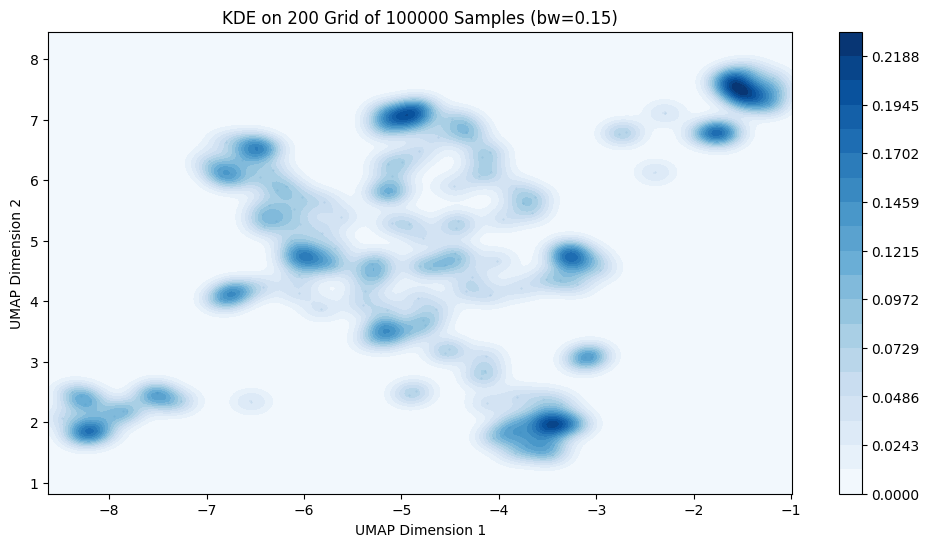

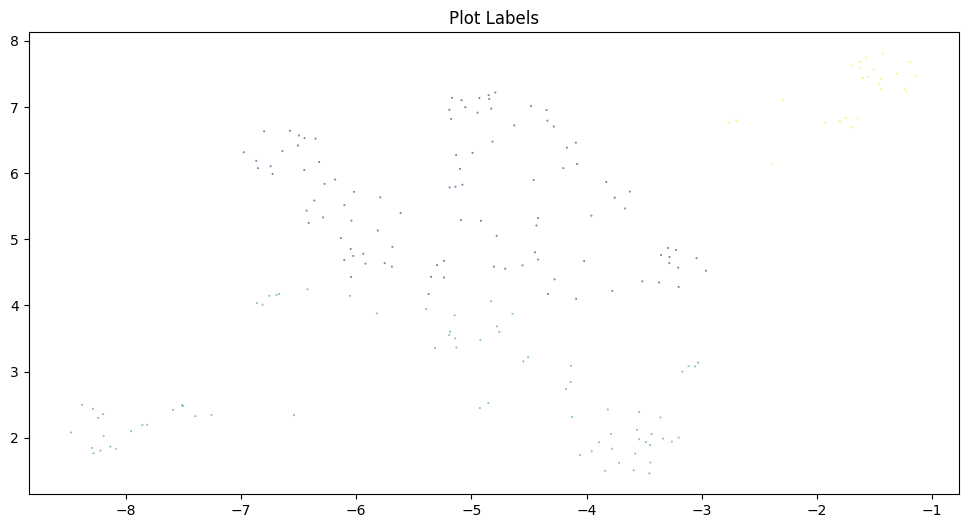

200it [00:00, 486860.59it/s]


5 9


100%|███████████████████████████████████| 5/5 [00:00<00:00, 54.96it/s]



###   compute data...  ###


100%|██████████████████████████| 200/200 [00:00<00:00, 3238844.79it/s]


###   save data...  ###


In [38]:
wizGenerator.run()

In [39]:
from model.generate_wizmap import wizmap_local

In [42]:
wizmap_local(directory_folder_of_wizmap='./output/wizmapJson/',port=3333)

https://poloclub.github.io/wizmap/?dataURL=http://localhost:3333/./output/wizmapJson/data.ndjson&gridURL=http://localhost:3333/./output/wizmapJson/grid.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
127.0.0.1 - - [20/Jun/2024 14:55:29] "OPTIONS /output/wizmapJson/grid.json HTTP/1.1" 204 -
127.0.0.1 - - [20/Jun/2024 14:55:29] "GET /output/wizmapJson/grid.json HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2024 14:55:29] "OPTIONS /output/wizmapJson/data.ndjson HTTP/1.1" 204 -
127.0.0.1 - - [20/Jun/2024 14:55:29] "GET /output/wizmapJson/data.ndjson HTTP/1.1" 200 -


<class 'http_server.server.CORSRequestHandler'>
Starting httpd server on port 3333...


Traceback (most recent call last):
  File "/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/bin/server", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/http_server/server.py", line 31, in main
    run(port=args.port, allow_all_cors=args.allow_cors)
  File "/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/http_server/server.py", line 22, in run
    httpd.serve_forever()
  File "/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/socketserver.py", line 235, in serve_forever
    ready = selector.select(poll_interval)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 

## **One-Short**

In [1]:
from dsm_wizservices import TopicModel
from sklearn.cluster import MeanShift
from sentence_transformers import SentenceTransformer 
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_stopwords
from datasets import load_dataset
import pandas as pd
import re
import string
import datasets

def cleanText(text):
    
    # source : https://github.com/naenumtou
    clear_list = r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#]*[\w@?^=%&/~+#])?|“|”|[()\/\+\*.,]|,|ๆ|<.*?>|#|'
    
    # text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(clear_list,'',text)

    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
       text = re.sub(r'\{}'.format(c),'',text)
        
    text = ' '.join(text.split())
    # text = text.translate(str.maketrans('', '', textPunc)) # Remove punctuation without (.)
    text = ' '.join(text.split())  # Keep only one white space
    return text

/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/dsm_wizservices/generate_vector/node.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
data = datasets.load_dataset('imdb')['unsupervised']

In [3]:
df = pd.DataFrame(data)[['text']]
df = df.sample(5000)
df['text'] = df['text'].apply(cleanText)
df

,text
34579,I checked out the DVD at my library because I ...
29062,There is no doubt that Buñuel is a pro in intr...
49464,I enjoy watching the stars of this movie in th...
31983,George S Kauffman Moss Harts GEORGE WASHINGTON...
35200,What a disappointment And if youre going to ma...
...,...
32880,Jack Black can usually make me snicker simply ...
21148,The beginning of the goddamn movie lets start ...
20407,Dont expect to see a lot of football here caus...
33802,The first Zenon movie was hilariously kitschy ...


In [5]:
gemini_key = <Gemini_API_KEYS>

embeder = SentenceTransformer(
    'all-MiniLM-L6-v2', 
    device='cpu'
)

reducer = UMAP(
    n_components=2, 
    n_neighbors=60, 
    min_dist=0.2
)

cv = CountVectorizer( 
    tokenizer=lambda text: word_tokenize(text, engine='attacut'), 
    stop_words='english'
)
clustering = MeanShift(bandwidth=0.7)

wizard = TopicModel(
    save_folder='output_test/', 
    # gpt_api_key=api_key,
    n_sample_summary=10,
    gemini_api_key=gemini_key,
    embedding=embeder, 
    reducer=reducer, 
    clustering=clustering, 
    countvector=cv, 
    batch_size=126, 
    device='cpu',
    verbose=True
)

/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [6]:
docs = df.text.tolist()

embedding -> reduction dimension ...


Batches:   0%|          | 0/40 [00:00<?, ?it/s]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Cluster :   0%|          | 0/12 [00:00<?, ?it/s]

/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/dsm_wizservices/generate_topic/node.py:269: UserWarning: create summary fail	e:Invalid operation: The `response.parts` quick accessor requires a single candidate, but none were returned. Please check the `response.prompt_feedback` to determine if the prompt was blocked. attemp new one
  warnings.warn(f"create summary fail\te:{e} attemp new one")
/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/dsm_wizservices/generate_topic/node.py:269: UserWarning: create summary fail	e:429 Resource has been exhausted (e.g. check quota). attemp new one
  warnings.warn(f"create summary fail\te:{e} attemp new one")
/Users/peetiphartsuebpeng/Documents/CO

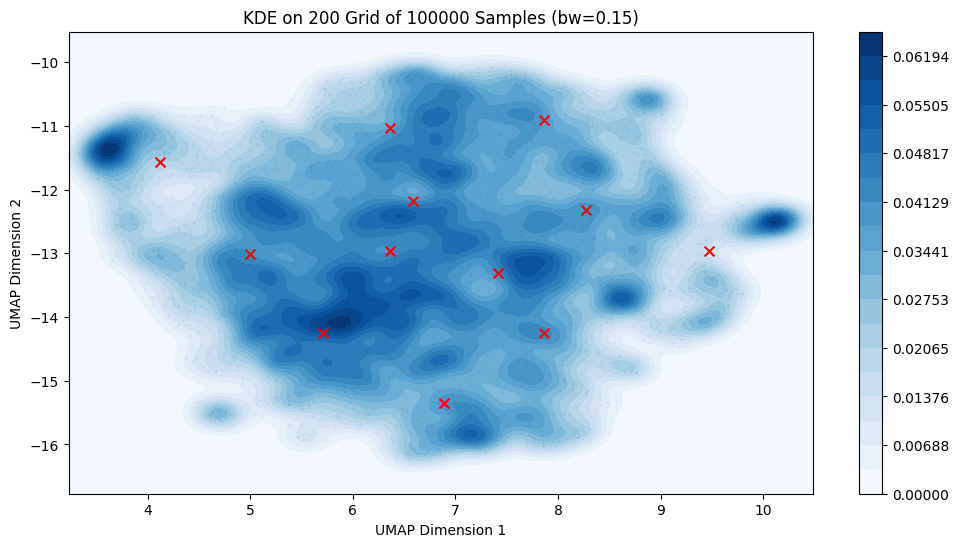

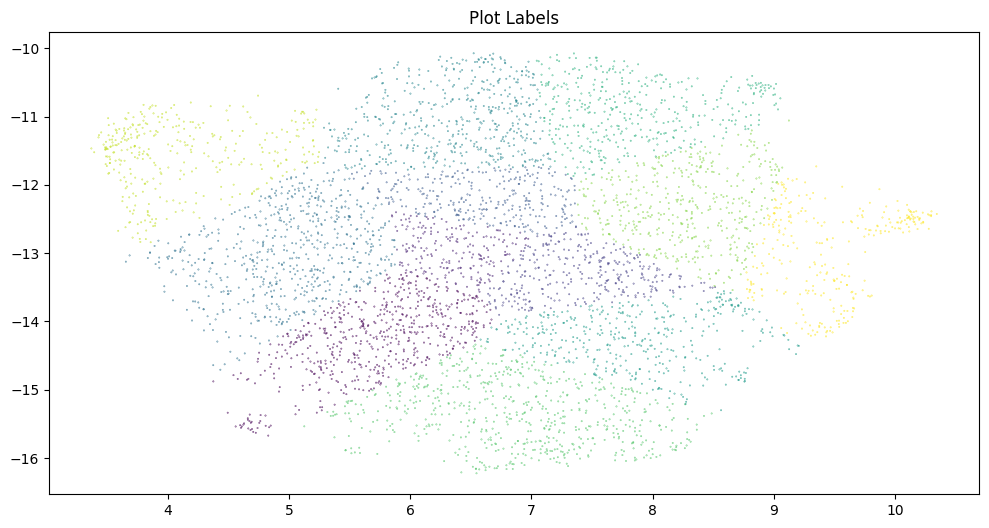

5000it [00:00, 378697.68it/s]
/Users/peetiphartsuebpeng/Documents/CONDA_ENV/env-wizmap/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 3441339.02it/s]


In [7]:
d_rs = wizard.fit_transforms(docs)

In [10]:
d_rs.keys()

dict_keys(['data', 'model', 'topword'])

In [11]:
df = d_rs.get('data')
df

,data_process,vector,x,y,data_display,cluster
0,I checked out the DVD at my library because I ...,"[-0.018698912, 0.0159787, -0.0043828427, -0.04...",4.753970,-14.458088,X: 4.754 Y: -14.4581 Content: I checked out th...,0
1,There is no doubt that Buñuel is a pro in intr...,"[0.031386375, -0.008208242, -0.0070380946, -0....",6.630668,-12.360550,X: 6.6307 Y: -12.3606 Content: There is no dou...,3
2,I enjoy watching the stars of this movie in th...,"[-0.059551343, -0.14399152, -0.018924227, -0.0...",5.612566,-12.037004,X: 5.6126 Y: -12.037 Content: I enjoy watching...,3
3,George S Kauffman Moss Harts GEORGE WASHINGTON...,"[-0.044262946, -0.02259889, 0.02257464, 0.0075...",6.472824,-10.576408,X: 6.4728 Y: -10.5764 Content: George S Kauffm...,5
4,What a disappointment And if youre going to ma...,"[0.008464869, -0.07626434, 0.04506604, -0.0474...",5.591044,-14.328239,X: 5.591 Y: -14.3282 Content: What a disappoin...,0
...,...,...,...,...,...,...
4995,Jack Black can usually make me snicker simply ...,"[-0.08267005, -0.0127807185, -0.054352093, -0....",8.291154,-12.768102,X: 8.2912 Y: -12.7681 Content: Jack Black can ...,9
4996,The beginning of the goddamn movie lets start ...,"[-0.014893235, 0.012000987, -0.012138615, -0.0...",5.721483,-14.223676,X: 5.7215 Y: -14.2237 Content: The beginning o...,0
4997,Dont expect to see a lot of football here caus...,"[-0.008601036, -0.0027451995, -0.04133117, -0....",6.173736,-13.015920,X: 6.1737 Y: -13.0159 Content: Dont expect to ...,1
4998,The first Zenon movie was hilariously kitschy ...,"[-0.13444814, -0.057827517, -0.05999648, -0.03...",5.005800,-12.542340,X: 5.0058 Y: -12.5423 Content: The first Zenon...,4


In [12]:
tw = d_rs.get('topword')
# tw['summary'] = tw['summary'].apply(eval)
tw

,cluster,topword,summary
0,0,"[[(dont, 0.0026), (really, 0.0027), (good, 0.0...","{'header': 'Movies: why are they so bad?', 'su..."
1,3,"[[(character, 0.0018), (great, 0.0022), (time,...","{ 'header': 'Plays', 'summary': 'This is a gre..."
2,5,"[[(love, 0.0019), (time, 0.002), (great, 0.002...","{ ""header"": ""Critique of Cruel Intentions 2..."
3,2,"[[(story, 0.0017), (character, 0.0017), (peopl...","{'header': 'This Movie Can Be Watched', 'summa..."
4,8,"[[(time, 0.002), (really, 0.0021), (bad, 0.002...",{'header':'The Water Horse Legend of the Deep'...
5,4,"[[(funny, 0.0023), (time, 0.0025), (great, 0.0...",{'header': 'The movie got off to a quick start...
6,1,"[[(bad, 0.0018), (time, 0.0027), (just, 0.0037...","{ ""header"": ""Green"", ""summary"": ""Green is a we..."
7,9,"[[(people, 0.0017), (really, 0.0018), (time, 0...","{'header':'Babylon AD', 'summary':'Babylon AD ..."
8,7,"[[(character, 0.0015), (way, 0.0016), (film, 0...","{'header':'Documentary Films', 'summary':'Here..."
9,11,"[[(people, 0.0017), (films, 0.0018), (time, 0....","{ ""header"": ""Reviewed Feature Films"", ""summa..."


In [27]:
tw[tw['cluster']==0]['summary'].values[0]

"{'header': 'Movies: why are they so bad?', 'summary': 'This was a very well done movie with a great cast Patrick Swayze did an excellent job of portraying a redneckgonebigcity cop Liam did a fantastic job of playing the outforrevenge redneckvsmafia role as well The special effects are ripoff from Hollywood tooOverall a movie you can do without'}"

In [21]:
def print_topword(tw, cluster):
    max_ = 0
    tw = tw[tw['cluster'] == cluster]
    data = tw['topword'].values[0]
    data = dict(data[0])
    sorted_word_scores = dict(sorted(data.items(), key=lambda x: x[1], reverse=True))
    
    # หาความยาวของคำที่ยาวที่สุด
    for i in sorted_word_scores:
        if len(i) > max_:
            max_ = len(i)
    
    # พิมพ์คำและคะแนนพร้อมเส้นขีดล่าง (_)
    for word, score in sorted_word_scores.items():
        thresh = max_ - len(word)
        print(f'topword: {word} {"_" * (thresh + 5)} scores: {score}')

In [22]:
for i in tw['cluster'].unique() : 
    print()
    print(f'cluster: {i}')
    try : 
        print(f'header of cluster : {tw[tw['cluster']==i]['summary'].values[0].get('header')}')
        print(f'summary : {tw[tw['cluster']==i]['summary'].values[0].get('summary')}')

    except :
        pass
    print_topword(tw, i)


cluster: 0
topword:   __________ scores: 0.9998
topword: movie ______ scores: 0.0121
topword: film _______ scores: 0.0061
topword: bad ________ scores: 0.0042
topword: just _______ scores: 0.004
topword: like _______ scores: 0.0038
topword: good _______ scores: 0.0032
topword: time _______ scores: 0.0028
topword: really _____ scores: 0.0027
topword: dont _______ scores: 0.0026

cluster: 3
topword:   _____________ scores: 0.9999
topword: film __________ scores: 0.0088
topword: movie _________ scores: 0.0077
topword: like __________ scores: 0.0034
topword: just __________ scores: 0.0026
topword: good __________ scores: 0.0026
topword: story _________ scores: 0.0024
topword: time __________ scores: 0.0023
topword: great _________ scores: 0.0022
topword: character _____ scores: 0.0018

cluster: 5
topword:   _________ scores: 0.9999
topword: film ______ scores: 0.006
topword: movie _____ scores: 0.0055
topword: like ______ scores: 0.0027
topword: just ______ scores: 0.0026
topword: great _

In [24]:
from dsm_wizservices import wizmap_local
wizmap_local(directory_folder_of_wizmap='output_test/wizmapJson/')

https://poloclub.github.io/wizmap/?dataURL=http://localhost:8000/output_test/wizmapJson/data.ndjson&gridURL=http://localhost:8000/output_test/wizmapJson/grid.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
127.0.0.1 - - [18/Jul/2024 15:35:48] "OPTIONS /output_test/wizmapJson/grid.json HTTP/1.1" 204 -
127.0.0.1 - - [18/Jul/2024 15:35:48] "GET /output_test/wizmapJson/grid.json HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2024 15:35:48] "OPTIONS /output_test/wizmapJson/data.ndjson HTTP/1.1" 204 -
127.0.0.1 - - [18/Jul/2024 15:35:48] "GET /output_test/wizmapJson/data.ndjson HTTP/1.1" 200 -


<class 'http_server.server.CORSRequestHandler'>
Starting httpd server on port 8000...


Traceback (most recent call last):
  File "/Users/peetiphartsuebpeng/miniconda3/bin/server", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/Users/peetiphartsuebpeng/miniconda3/lib/python3.12/site-packages/http_server/server.py", line 31, in main
    run(port=args.port, allow_all_cors=args.allow_cors)
  File "/Users/peetiphartsuebpeng/miniconda3/lib/python3.12/site-packages/http_server/server.py", line 22, in run
    httpd.serve_forever()
  File "/Users/peetiphartsuebpeng/miniconda3/lib/python3.12/socketserver.py", line 235, in serve_forever
    ready = selector.select(poll_interval)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/peetiphartsuebpeng/miniconda3/lib/python3.12/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

KeyboardInterrupt

